## E-Commerce Sales Analysis

### Key Objectives:
1. Data preprocessing
2. EDA and Statistics Descriptive Analysis
3. Visualize
   - sales trend
   - sales distribution (by country or product)
   - customer analysis
   - product analysis
   - correlation
4. Insight for business baed on data visualization provided

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Generate the data

In [3]:
df = pd.read_csv('online_retail(in).csv')

df.head()

,index,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   index        541909 non-null  int64  
 1   InvoiceNo    541909 non-null  object 
 2   StockCode    541909 non-null  object 
 3   Description  540455 non-null  object 
 4   Quantity     541909 non-null  int64  
 5   InvoiceDate  541909 non-null  object 
 6   UnitPrice    541909 non-null  float64
 7   CustomerID   406829 non-null  float64
 8   Country      541909 non-null  object 
dtypes: float64(2), int64(2), object(5)
memory usage: 37.2+ MB


### Data Preprocessing
1. Handle missing values

In [7]:
df.isnull().sum()

index               0
InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [9]:
df = df.dropna(subset = 'CustomerID')
df.isnull().sum()

index          0
InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

2. Removing duplicates

In [11]:
df_cleaned = df.drop_duplicates()
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 406829 entries, 0 to 541908
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   index        406829 non-null  int64  
 1   InvoiceNo    406829 non-null  object 
 2   StockCode    406829 non-null  object 
 3   Description  406829 non-null  object 
 4   Quantity     406829 non-null  int64  
 5   InvoiceDate  406829 non-null  object 
 6   UnitPrice    406829 non-null  float64
 7   CustomerID   406829 non-null  float64
 8   Country      406829 non-null  object 
dtypes: float64(2), int64(2), object(5)
memory usage: 31.0+ MB


3. Convert InvoiceDate to DateTime
4. Convert CustomerID to int

In [13]:
df_cleaned['InvoiceDate'] = pd.to_datetime(df_cleaned['InvoiceDate'])
df_cleaned['CustomerID'] = df_cleaned['CustomerID'].astype('int64')

df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 406829 entries, 0 to 541908
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   index        406829 non-null  int64         
 1   InvoiceNo    406829 non-null  object        
 2   StockCode    406829 non-null  object        
 3   Description  406829 non-null  object        
 4   Quantity     406829 non-null  int64         
 5   InvoiceDate  406829 non-null  datetime64[ns]
 6   UnitPrice    406829 non-null  float64       
 7   CustomerID   406829 non-null  int64         
 8   Country      406829 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(3), object(4)
memory usage: 31.0+ MB


In [15]:
df_cleaned.head()

,index,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom
1,1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
2,2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom
3,3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
4,4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom


### EDA

Get summary of columns with numerical data type

In [17]:
df_cleaned.describe()

,index,Quantity,InvoiceDate,UnitPrice,CustomerID
count,406829.000000,406829.000000,406829,406829.000000,406829.000000
mean,278048.159318,12.061303,2011-07-10 16:30:57.879207424,3.460471,15287.690570
min,0.000000,-80995.000000,2010-12-01 08:26:00,0.000000,12346.000000
25%,147749.000000,2.000000,2011-04-06 15:02:00,1.250000,13953.000000
50%,284435.000000,5.000000,2011-07-31 11:48:00,1.950000,15152.000000
75%,409528.000000,12.000000,2011-10-20 13:06:00,3.750000,16791.000000
max,541908.000000,80995.000000,2011-12-09 12:50:00,38970.000000,18287.000000
std,152744.019884,248.693370,NaN,69.315162,1713.600303


Drop rows with UnitPrice value equals 0

In [19]:
df_cleaned = df_cleaned[df_cleaned['UnitPrice'] > 0]
df_cleaned.describe()

,index,Quantity,InvoiceDate,UnitPrice,CustomerID
count,406789.000000,406789.000000,406789,406789.000000,406789.000000
mean,278045.939113,12.028359,2011-07-10 16:28:44.845459968,3.460811,15287.795830
min,0.000000,-80995.000000,2010-12-01 08:26:00,0.001000,12346.000000
25%,147749.000000,2.000000,2011-04-06 15:02:00,1.250000,13954.000000
50%,284430.000000,5.000000,2011-07-31 11:46:00,1.950000,15152.000000
75%,409523.000000,12.000000,2011-10-20 13:06:00,3.750000,16791.000000
max,541908.000000,80995.000000,2011-12-09 12:50:00,38970.000000,18287.000000
std,152743.506134,247.927842,NaN,69.318561,1713.573064


#### Get data point's distribution of Quantity column

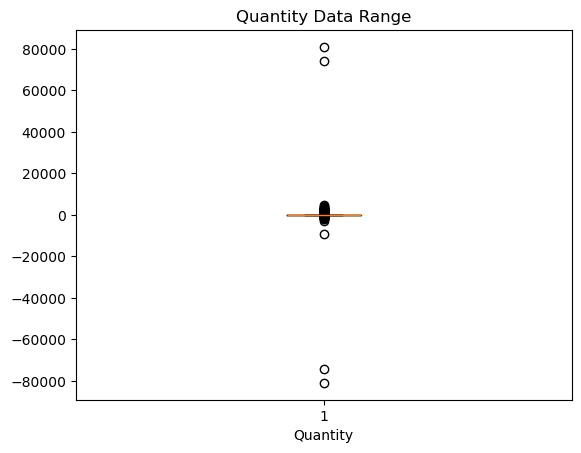

In [21]:
plt.boxplot(df_cleaned['Quantity'])
plt.title('Quantity Data Range')
plt.xlabel('Quantity')

plt.show()

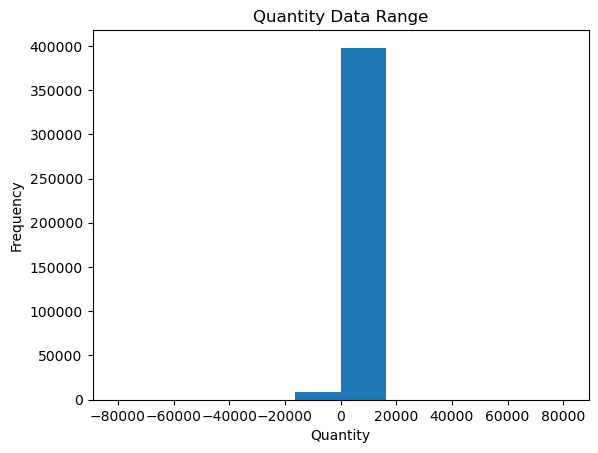

In [23]:
df_cleaned['Quantity'].plot(kind='hist')
plt.title('Quantity Data Range')
plt.xlabel('Quantity')

plt.show()

#### Create function to calculate upper and lower boundaries of a set of data

In [25]:
def find_boundaries(df, variable, distance):
	IQR = df[variable].quantile(0.75) - df[variable].quantile(0.25)
	lower_boundary = df[variable].quantile(0.25) - (IQR * distance)
	upper_boundary = df[variable].quantile(0.75) + (IQR * distance)
	
	return upper_boundary, lower_boundary

#### Investigate Quantity's data point with relative extreme values

In [28]:
df_cleaned[(df_cleaned['Quantity'] < -2000) | (df_cleaned['Quantity'] > 2000)]

,index,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
4287,4287,C536757,84347,ROTATING SILVER ANGELS T-LIGHT HLDR,-9360,2010-12-02 14:23:00,0.03,15838,United Kingdom
4945,4945,536830,84077,WORLD WAR 2 GLIDERS ASSTD DESIGNS,2880,2010-12-02 17:38:00,0.18,16754,United Kingdom
32671,32671,539101,22693,GROW A FLYTRAP OR SUNFLOWER IN TIN,2400,2010-12-16 10:35:00,0.94,16029,United Kingdom
52711,52711,540815,21108,FAIRY CAKE FLANNEL ASSORTED COLOUR,3114,2011-01-11 12:55:00,2.10,15749,United Kingdom
61619,61619,541431,23166,MEDIUM CERAMIC TOP STORAGE JAR,74215,2011-01-18 10:01:00,1.04,12346,United Kingdom
61624,61624,C541433,23166,MEDIUM CERAMIC TOP STORAGE JAR,-74215,2011-01-18 10:17:00,1.04,12346,United Kingdom
80742,80742,543057,84077,WORLD WAR 2 GLIDERS ASSTD DESIGNS,2592,2011-02-03 10:50:00,0.21,16333,United Kingdom
87631,87631,543669,22693,GROW A FLYTRAP OR SUNFLOWER IN TIN,2400,2011-02-11 11:22:00,0.94,16029,United Kingdom
91772,91772,544152,18007,ESSENTIAL BALM 3.5g TIN IN ENVELOPE,2400,2011-02-16 12:10:00,0.06,14609,United Kingdom
97432,97432,544612,22053,EMPIRE DESIGN ROSETTE,3906,2011-02-22 10:43:00,0.82,18087,United Kingdom


##### Delete transactions with sum of quantity = 0 (e.g. InvoiceNo C550456 & 550456)
It can be assumed that those data are errors since it has the same UnitPrice, CustomerID, and InvoiceDate (several minutes of difference), which will result in 0 if we calculate the total sales amount by InvoiceDate or CustomerID

In this case, 3 pairs of transactions have a total quantity of 0 (listed by index);
1. 61619, 61624
2. 160145, 160546
3. 540421, 540422

It also does not make sense if someone makes a transaction with a quantity below 0, so we also drop those data with quantity below 0

In [32]:
index = [61619, 61624, 160145, 160546, 540421, 540422]
df_cleaned.drop(index, inplace=True)

df_cleaned = df_cleaned[df_cleaned['Quantity'] > 0]
df_cleaned.describe()

,index,Quantity,InvoiceDate,UnitPrice,CustomerID
count,397881.000000,397881.000000,397881,397881.000000,397881.000000
mean,278463.176869,12.590418,2011-07-10 23:41:46.442730240,3.116498,15294.426826
min,0.000000,1.000000,2010-12-01 08:26:00,0.001000,12347.000000
25%,148334.000000,2.000000,2011-04-07 11:12:00,1.250000,13969.000000
50%,284903.000000,6.000000,2011-07-31 14:39:00,1.950000,15159.000000
75%,410074.000000,12.000000,2011-10-20 14:33:00,3.750000,16795.000000
max,541908.000000,4800.000000,2011-12-09 12:50:00,8142.750000,18287.000000
std,152770.362348,42.603274,NaN,22.097960,1713.140518


#### Display the updated data point's distribution of Quantity column

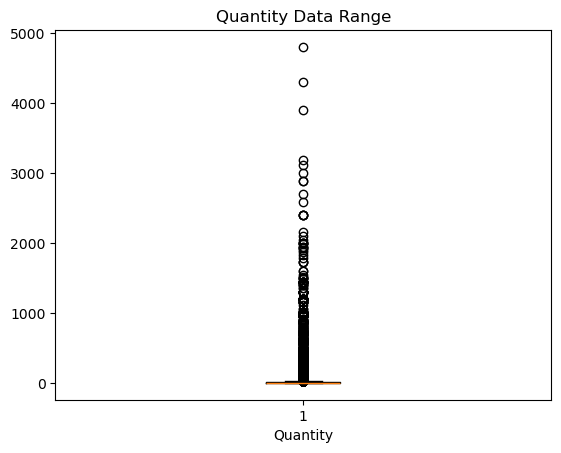

In [35]:
plt.boxplot(df_cleaned['Quantity'])
plt.title('Quantity Data Range')
plt.xlabel('Quantity')

plt.show()

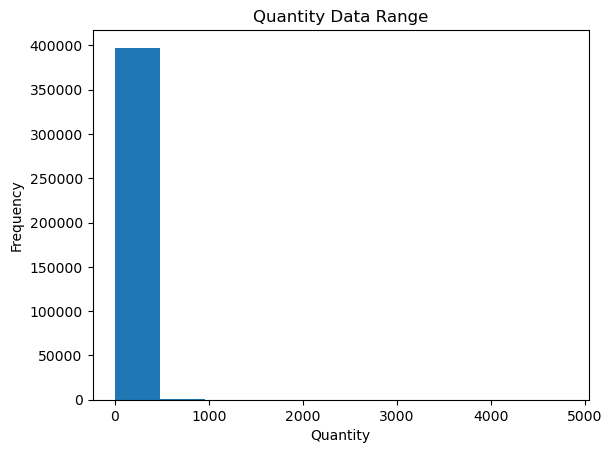

In [37]:
df_cleaned['Quantity'].plot(kind='hist')
plt.title('Quantity Data Range')
plt.xlabel('Quantity')

plt.show()

In [39]:
qty_upper_boundary, qty_lower_boundary = find_boundaries(df_cleaned, 'Quantity', 1.5)
print(f'Upper boundary for Quantity: {qty_upper_boundary}')
print(f'Lower boundary for Quantity: {qty_lower_boundary}')

Upper boundary for Quantity: 27.0
Lower boundary for Quantity: -13.0


#### Get data point's distribution of UnitPrice column

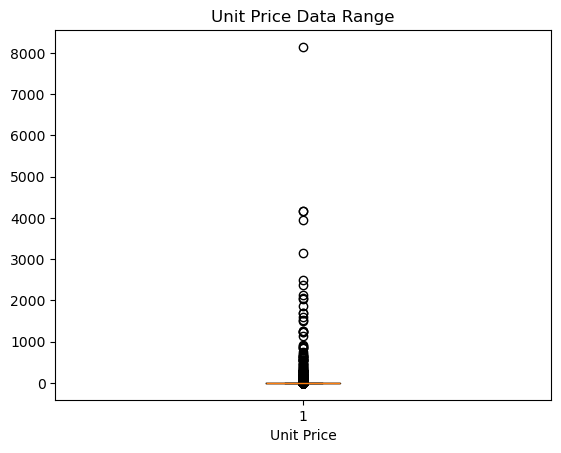

In [41]:
plt.boxplot(df_cleaned['UnitPrice'])
plt.title('Unit Price Data Range')
plt.xlabel('Unit Price')

plt.show()

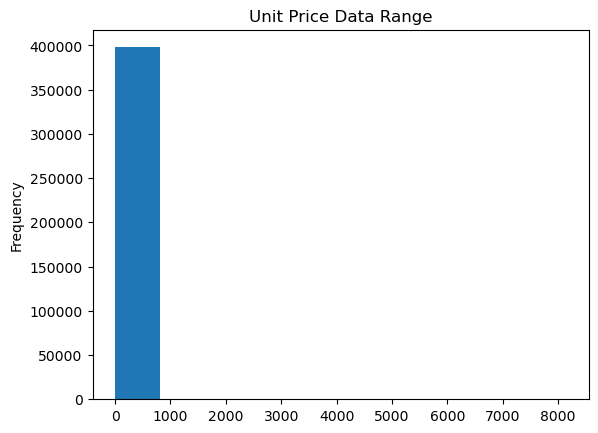

In [43]:
df_cleaned['UnitPrice'].plot(kind='hist')
plt.title('Unit Price Data Range')

plt.show()

In [45]:
price_upper_boundary, price_lower_boundary = find_boundaries(df_cleaned, 'UnitPrice', 1.5)
print(f'Upper boundary for UnitPrice: {price_upper_boundary}')
print(f'Lower boundary for UnitPrice: {price_lower_boundary}')

Upper boundary for UnitPrice: 7.5
Lower boundary for UnitPrice: -2.5


#### Get value counts and distribution of country within the dataframe

In [47]:
df_country_dist = df_cleaned['Country'].value_counts().reset_index()
df_country_dist.head()

,Country,count
0,United Kingdom,354318
1,Germany,9040
2,France,8341
3,EIRE,7236
4,Spain,2484


Group countries with count less than 2000 to 'Other'

([<matplotlib.patches.Wedge at 0x2b869fb1af0>,
 [Text(-0.8538788452491431, 0.6934629893772197, 'Belgium'),
  Text(-0.9022898127827307, 0.6291844671862973, 'EIRE'),
  Text(-0.9726641601136424, 0.5137357605135375, 'France'),
  Text(-1.0338014303148853, 0.3758385327223619, 'Germany'),
  Text(-1.06339840180666, 0.2813962313803109, 'Netherlands'),
  Text(-1.0884968355348295, 0.15866517901121993, 'Other'),
  Text(-1.0995111362203953, 0.032791177583849286, 'Spain'),
  Text(1.0317294222616993, -0.38148971052905234, 'United Kingdom')],
 [Text(-0.4657520974086235, 0.37825253966030165, '0.5%'),
  Text(-0.49215807969967124, 0.3431915275561621, '1.8%'),
  Text(-0.530544087334714, 0.2802195057346568, '2.1%'),
  Text(-0.5638916892626645, 0.2050028360303792, '2.3%'),
  Text(-0.5800354918945417, 0.15348885348016958, '0.6%'),
  Text(-0.5937255466553615, 0.08654464309702904, '3.0%'),
  Text(-0.5997333470293065, 0.01788609686391779, '0.6%'),
  Text(0.5627615030518359, -0.20808529665221034, '89.1%')])

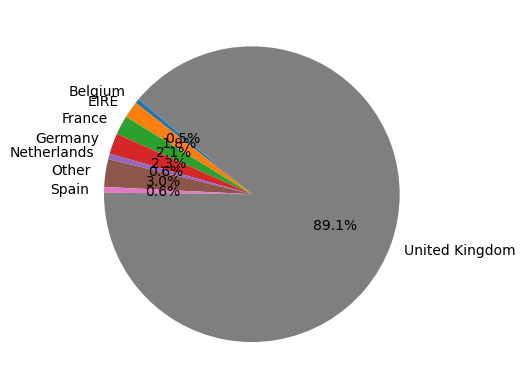

In [50]:
df_country_dist.loc[df_country_dist['count'] < 2000, 'Country'] = 'Other'
df_country_dist = df_country_dist['count'].groupby(df_country_dist['Country']).sum().reset_index()

plt.pie(df_country_dist['count'], labels=df_country_dist['Country'], autopct='%1.1f%%', startangle=140)

#### Get unique count of product code (StockCode column)

In [52]:
df_cleaned['StockCode'].nunique()

3664

#### Get unique count of product description (Description column)

In [54]:
df_cleaned['Description'].nunique()

# to do: StockCode unique count < Description unique count, 
# clean duplicated product description

3876

#### Get unique count of CustomerID

In [56]:
df_cleaned['CustomerID'].nunique()

4337

#### Advanced Preprocessing
Additional Features:
1. Replace the description name for each StockCode using the mode value of the description

In [58]:
# iloc[0] is used to output the first value if there are 2 values of mode

new_desc = df_cleaned.groupby('StockCode')['Description'].agg(lambda x: x.mode().iloc[0]).reset_index()
new_desc.nunique()

StockCode      3664
Description    3646
dtype: int64

The count result above indicates that there are products with the same description but have multiple StockCode, 

so it is better to use StockCode column to visualize the product distribution later

In [57]:
# Check duplicate product code of each description
df_duplicate_desc = df.groupby('Description')['StockCode'].nunique().reset_index()
df_duplicate_desc.columns = ['Description', 'StockCodeCount']

df_duplicate_desc[df_duplicate_desc['StockCodeCount'] > 1]
df[df['Description'] == 'METAL SIGN,CUPCAKE SINGLE HOOK']

df_check = df[['StockCode', 'Description', 'Country']][df['Description'].isin(['METAL SIGN,CUPCAKE SINGLE HOOK'])].drop_duplicates()
df_check

,StockCode,Description,Country
9190,82613B,"METAL SIGN,CUPCAKE SINGLE HOOK",United Kingdom
29818,82613C,"METAL SIGN,CUPCAKE SINGLE HOOK",United Kingdom
37451,82613B,"METAL SIGN,CUPCAKE SINGLE HOOK",Germany
39555,82613A,"METAL SIGN,CUPCAKE SINGLE HOOK",United Kingdom
41329,82613B,"METAL SIGN,CUPCAKE SINGLE HOOK",France
54389,82613B,"METAL SIGN,CUPCAKE SINGLE HOOK",Cyprus
54391,82613C,"METAL SIGN,CUPCAKE SINGLE HOOK",Cyprus
63028,82613B,"METAL SIGN,CUPCAKE SINGLE HOOK",Switzerland
258225,82613B,"METAL SIGN,CUPCAKE SINGLE HOOK",Canada
304730,82613B,"METAL SIGN,CUPCAKE SINGLE HOOK",Israel


2. Merge df_cleaned with new description column 

In [60]:
df_cleaned = df_cleaned.drop(columns='Description').merge(new_desc, on='StockCode', how='left')
df_cleaned.head()

,index,InvoiceNo,StockCode,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Description
0,0,536365,85123A,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,WHITE HANGING HEART T-LIGHT HOLDER
1,1,536365,71053,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,WHITE METAL LANTERN
2,2,536365,84406B,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,CREAM CUPID HEARTS COAT HANGER
3,3,536365,84029G,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,KNITTED UNION FLAG HOT WATER BOTTLE
4,4,536365,84029E,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,RED WOOLLY HOTTIE WHITE HEART.


3. Add columns to help analyze the data better
   1. InvoiceDate (extract date, day, month, time)
   2. Total Price of each transaction row

In [62]:
df_cleaned['Date'] = df_cleaned['InvoiceDate'].dt.date
df_cleaned['Day'] = df_cleaned['InvoiceDate'].dt.day
df_cleaned['DayName'] = df_cleaned['InvoiceDate'].dt.day_name()
df_cleaned['Month'] = df_cleaned['InvoiceDate'].dt.month
df_cleaned['Time'] = df_cleaned['InvoiceDate'].dt.time
df_cleaned['Total Price'] = df_cleaned['Quantity'] * df_cleaned['UnitPrice']

df_cleaned.head()

,index,InvoiceNo,StockCode,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Description,Date,Day,DayName,Month,Time,Total Price
0,0,536365,85123A,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,WHITE HANGING HEART T-LIGHT HOLDER,2010-12-01,1,Wednesday,12,08:26:00,15.30
1,1,536365,71053,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,WHITE METAL LANTERN,2010-12-01,1,Wednesday,12,08:26:00,20.34
2,2,536365,84406B,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,CREAM CUPID HEARTS COAT HANGER,2010-12-01,1,Wednesday,12,08:26:00,22.00
3,3,536365,84029G,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,KNITTED UNION FLAG HOT WATER BOTTLE,2010-12-01,1,Wednesday,12,08:26:00,20.34
4,4,536365,84029E,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,RED WOOLLY HOTTIE WHITE HEART.,2010-12-01,1,Wednesday,12,08:26:00,20.34


#### Data Visualization

##### Display sales trend

Text(0, 0.5, 'Percentage')

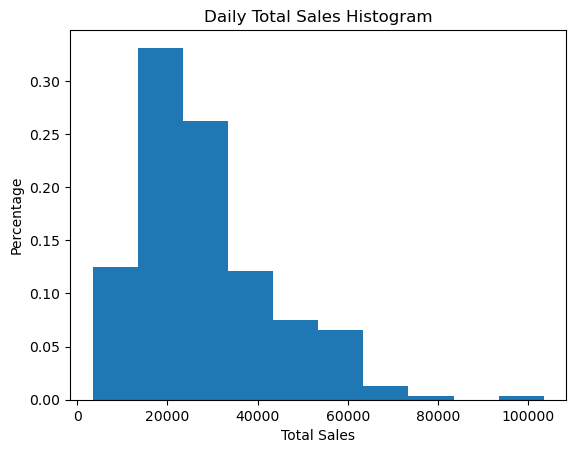

In [64]:
# Daily Total Sales
sales_daily = df_cleaned['Total Price'].groupby(df_cleaned['Date']).sum()

sales_daily.plot(kind='hist', weights=np.ones(len(sales_daily)) / len(sales_daily))

plt.title('Daily Total Sales Histogram')
plt.xlabel('Total Sales')
plt.ylabel('Percentage')

The chart above shows that the daily sales data is right-skewed with transactions below 40,000 a day are most common than transactions above 40,000 epecially 80,000

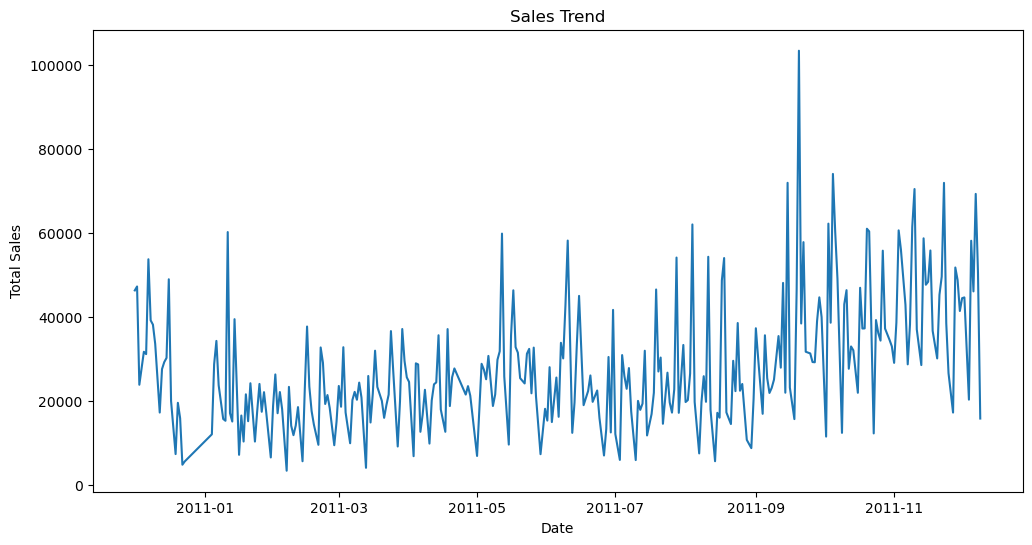

In [66]:
# Sales over time
x = df_cleaned['Date'].drop_duplicates()
y = sales_daily

fig, ax = plt.subplots(figsize=(12, 6))
plt.plot(x, y)
plt.title('Sales Trend')
plt.xlabel('Date')
plt.ylabel('Total Sales')

plt.show()

The daily sales hit its peak on someday between September-November with sales amount more than 100,000

##### Display quantity sold trend

Text(0, 0.5, 'Percentage')

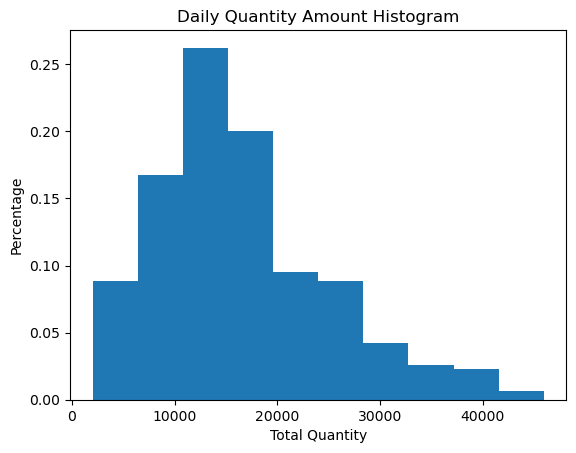

In [68]:
qty_daily = df_cleaned['Quantity'].groupby(df_cleaned['Date']).sum()
qty_daily.plot(kind='hist', weights=np.ones(len(qty_daily)) / len(qty_daily), bins=10)

plt.title('Daily Quantity Amount Histogram')
plt.xlabel('Total Quantity')
plt.ylabel('Percentage')

The chart above shows that the daily quantity sold data is right-skewed with total quantity below 20,000 a day are most common than quantity sold above 20,000

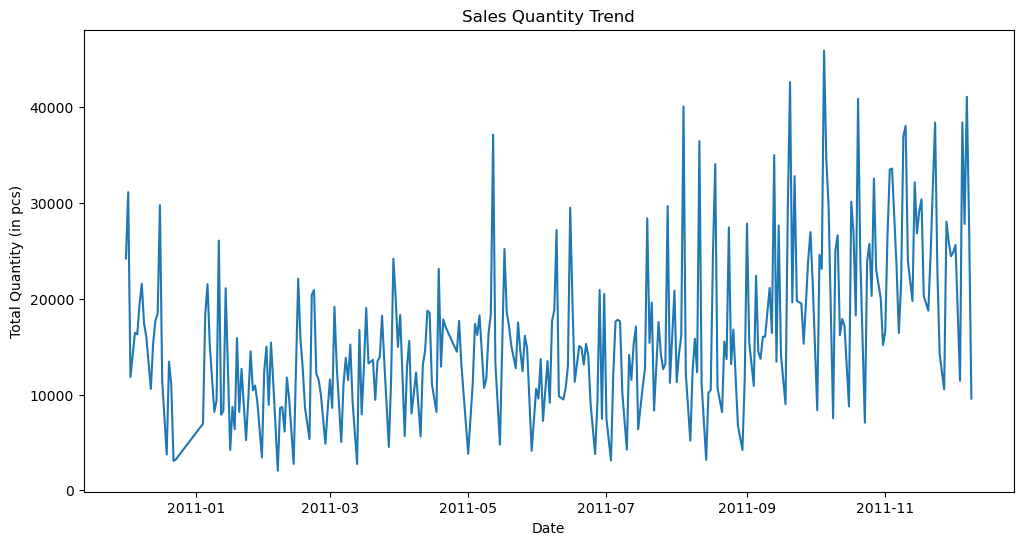

In [70]:
# Quantity over time
x = df_cleaned['Date'].drop_duplicates()
y_qty = df_cleaned['Quantity'].groupby(df_cleaned['Date']).sum()

# x, y
fig, ax = plt.subplots(figsize=(12, 6))
plt.plot(x, y_qty)

plt.title('Sales Quantity Trend')
plt.xlabel('Date')
plt.ylabel('Total Quantity (in pcs)')

plt.show()

The daily amount of quantity sold hit its peak on someday between September-November with more than 40,000 pcs sold in a day

##### Sales vs. Quantity over time

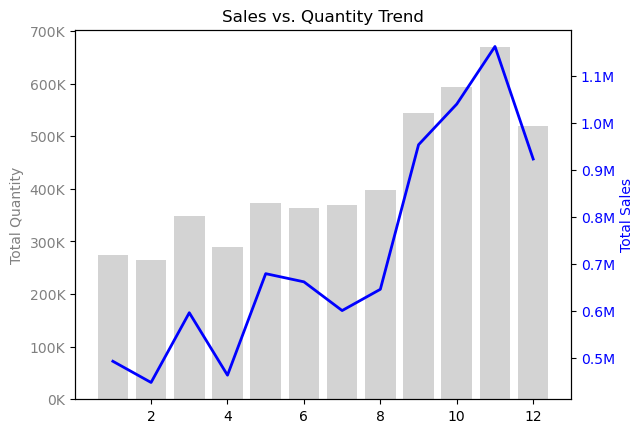

In [74]:
import matplotlib.ticker as ticker

fig, ax = plt.subplots()
ax2 = ax.twinx()

x = df_cleaned['Month'].sort_values(ascending=True).drop_duplicates()
y_sales = df_cleaned['Total Price'].groupby(df_cleaned['Month']).sum()
y_qty = df_cleaned['Quantity'].groupby(df_cleaned['Month']).sum()

ax2.plot(x, y_sales, linewidth=2, color='b')
ax.bar(x, y_qty, color='#D3D3D3')

plt.title('Sales vs. Quantity Trend')

ax2.set_xlabel('Month')
ax2.set_ylabel('Total Sales', color='b')
ax2.tick_params(axis='y', labelcolor='b')
ax2.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '{:.1f}M'.format(x*1e-6)))

ax.set_ylabel('Total Quantity', color='gray')
ax.tick_params(axis='y', labelcolor='gray')
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '{:.0f}K'.format(x*1e-3)))

plt.show()

Based on the chart above, both total sales and quantity hit its peak on November with more than 1.1 million sales amount and almost 700,000 pcs of items sold globally

#### Get total transaction made in each country

In [76]:
y = df_cleaned['InvoiceNo'].groupby(df_cleaned['Country']).count()
y_series = y.sort_values(ascending=False)
y_series

df_country = y_series.reset_index()
df_country.head()

,Country,InvoiceNo
0,United Kingdom,354318
1,Germany,9040
2,France,8341
3,EIRE,7236
4,Spain,2484


#### Display top and bottom 5 countries based on transaction counts

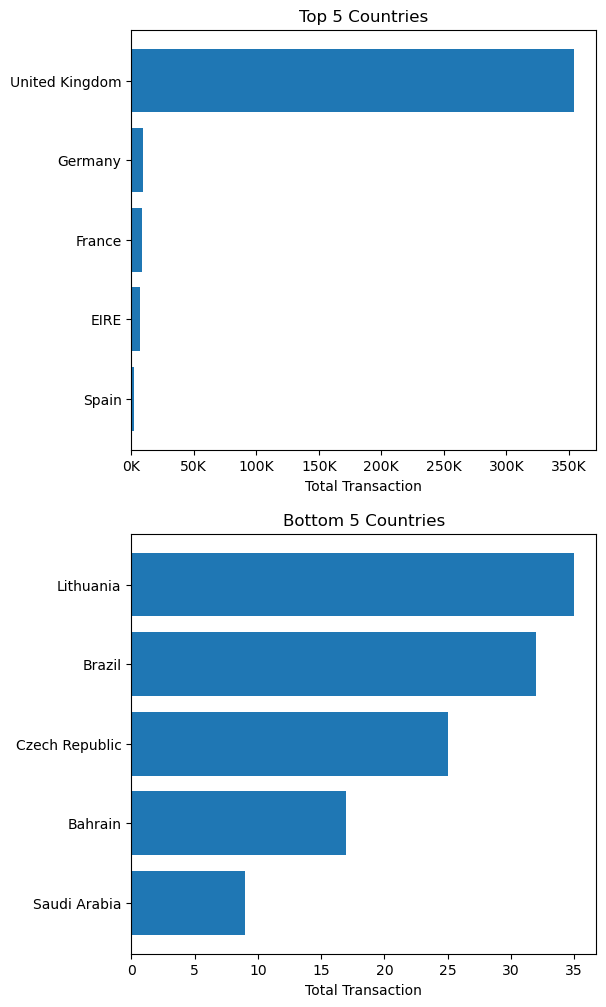

In [78]:
# Create a figure and two subplots (2 rows, 1 column)
fig, ax = plt.subplots(2, 1, figsize=(6, 12))

top = df_country.head().sort_values('InvoiceNo', ascending=True)
top

# Figure 1
ax[0].barh(top['Country'], top['InvoiceNo'])
ax[0].set_title('Top 5 Countries')
ax[0].set_xlabel('Total Transaction')
ax[0].xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '{:.0f}K'.format(x*1e-3)))

bottom = df_country.tail().sort_values('InvoiceNo', ascending=True)
bottom

# Figure 2
ax[1].barh(bottom['Country'], bottom['InvoiceNo'])
ax[1].set_title('Bottom 5 Countries')
ax[1].set_xlabel('Total Transaction')

plt.show()

##### Show Total Transaction by Country (except United Kingdom)

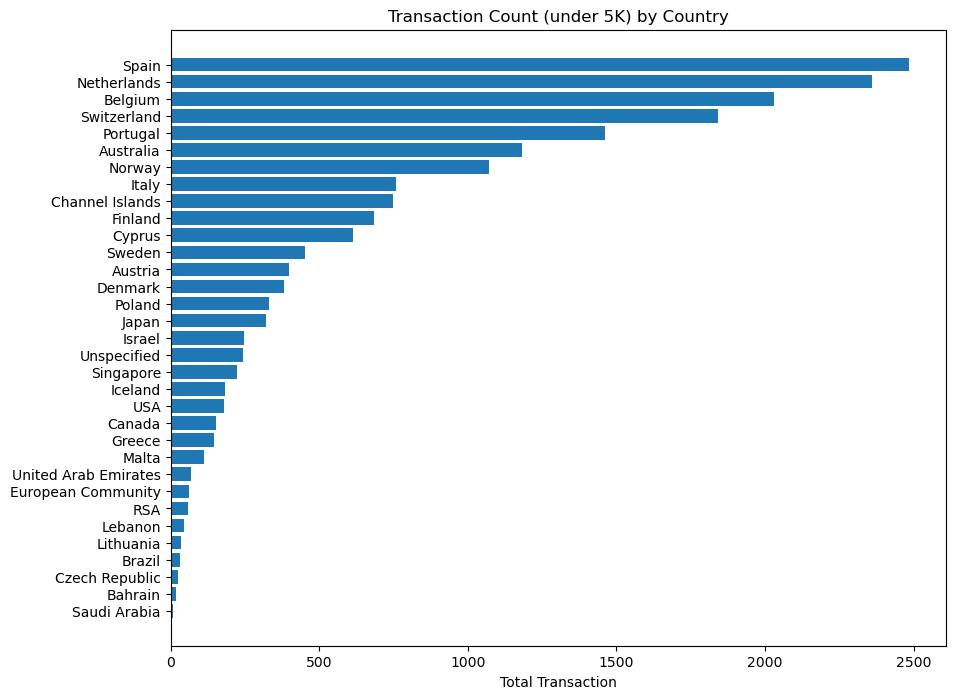

In [82]:
fig, ax = plt.subplots(1, 1, figsize=(10, 8))

df_country2 = df_country[df_country['InvoiceNo'] < 5000].sort_values('InvoiceNo')
plt.barh(df_country2['Country'], df_country2['InvoiceNo'])
ax.set_title('Transaction Count (under 5K) by Country')
ax.set_xlabel('Total Transaction')

plt.show()

In [84]:
df_country.nunique(), df_country[df_country['InvoiceNo'] < 1000].count()

(Country      37
 InvoiceNo    37
 dtype: int64,
 Country      26
 InvoiceNo    26
 dtype: int64)

Most of the countries (26 out of 37) has transaction count below 1,000 in a year

#### Display top and bottom 5 countries based on total sales amount

In [86]:
y = df_cleaned['Total Price'].groupby(df_cleaned['Country']).sum()
y_series = y.sort_values(ascending=False)
y_series

df_country_sales = y_series.reset_index()

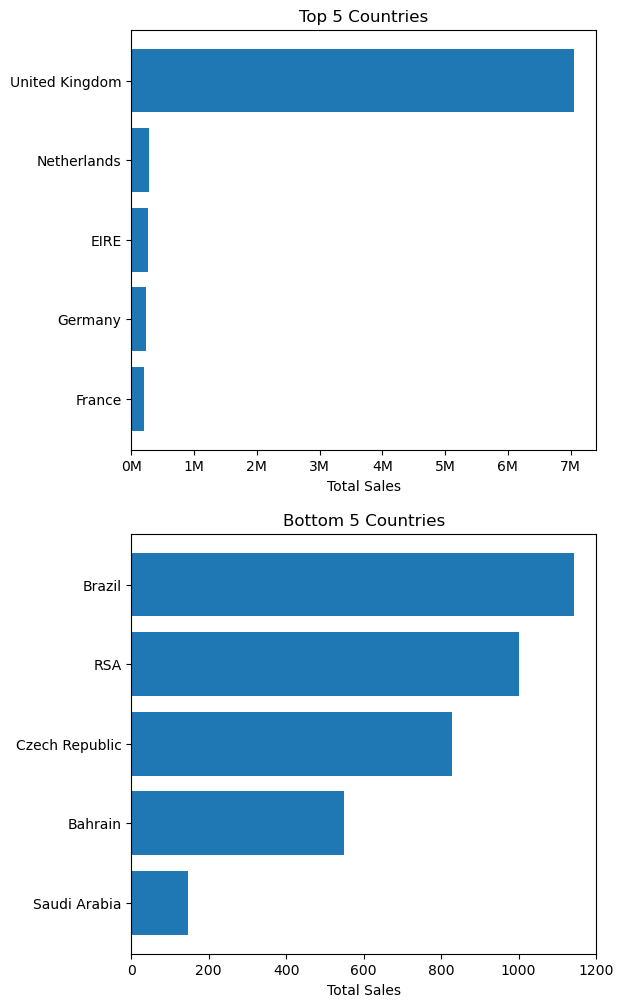

In [88]:
# Create a figure and two subplots (2 rows, 1 column)
fig, ax = plt.subplots(2, 1, figsize=(6, 12))

sales_top = df_country_sales.head().sort_values('Total Price', ascending=True)

# Figure 1
ax[0].barh(sales_top['Country'], sales_top['Total Price'])
ax[0].set_title('Top 5 Countries')
ax[0].set_xlabel('Total Sales')
ax[0].xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '{:.0f}M'.format(x*1e-6)))

sales_bottom = sales_top = df_country_sales.tail().sort_values('Total Price', ascending=True)

# Figure 2
ax[1].barh(sales_bottom['Country'], sales_bottom['Total Price'])
ax[1].set_title('Bottom 5 Countries')
ax[1].set_xlabel('Total Sales')

plt.show()

#### Sales distribution based on country

['United Kingdom' 'France' 'Australia' 'Netherlands' 'Germany' 'Norway'
 'EIRE' 'Switzerland' 'Spain' 'Poland' 'Portugal' 'Italy' 'Belgium'
 'Lithuania' 'Japan' 'Iceland' 'Channel Islands' 'Denmark' 'Cyprus'
 'Sweden' 'Finland' 'Austria' 'Greece' 'Singapore' 'Lebanon'
 'United Arab Emirates' 'Israel' 'Saudi Arabia' 'Czech Republic' 'Canada'
 'Unspecified' 'Brazil' 'USA' 'European Community' 'Bahrain' 'Malta' 'RSA']



Type the country you want to check the sales summary:  United Kingdom


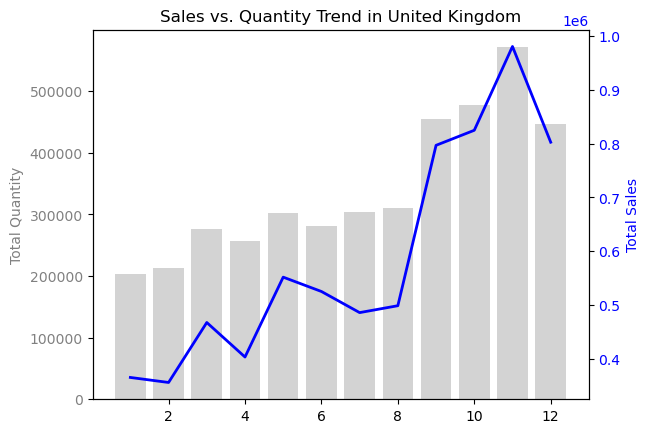

In [90]:
print(df_cleaned['Country'].unique())
print('')

message = 'Type the country you want to check the sales summary: '
country = input(message)

fig, ax = plt.subplots()
ax2 = ax.twinx()

df_country_filter = df_cleaned[df_cleaned['Country'] == country]

x = df_country_filter['Month'].sort_values(ascending=True).drop_duplicates()
y_sales = df_country_filter['Total Price'].groupby(df_country_filter['Month']).sum()
y_qty = df_country_filter['Quantity'].groupby(df_country_filter['Month']).sum()

ax2.plot(x, y_sales, linewidth=2, color='b')
ax.bar(x, y_qty, color='#D3D3D3')

title = 'Sales vs. Quantity Trend in ' + country
plt.title(title)

ax2.set_xlabel('Month')
ax2.set_ylabel('Total Sales', color='b')
ax2.tick_params(axis='y', labelcolor='b')

ax.set_ylabel('Total Quantity', color='gray')
ax.tick_params(axis='y', labelcolor='gray')

plt.show()

#### Get top and bottom 5 sales amount based on product code (StockCode)

In [92]:
y = df_cleaned['Total Price'].groupby(df_cleaned['StockCode']).sum()
y_series = y.sort_values(ascending=False)
y_series

df_product_sales = y_series.reset_index()

df_desc = df_cleaned[['StockCode', 'Description']].drop_duplicates().reset_index()
df_desc.head()

df_product_sales = df_product_sales.merge(df_desc, on='StockCode', how='left')

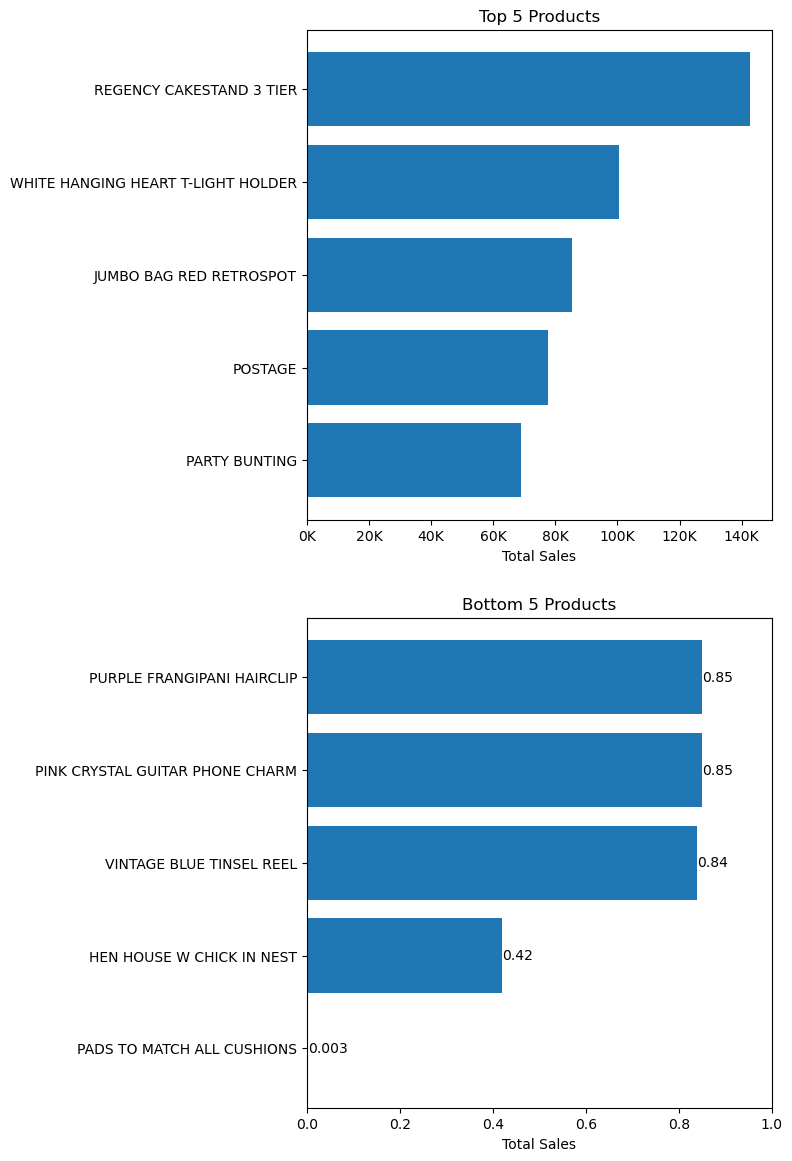

In [94]:
fig, ax = plt.subplots(2, 1, figsize=(6, 14))

prod_top = df_product_sales.head().sort_values('Total Price')

# # Figure 1
hbar_top = ax[0].barh(prod_top['Description'], prod_top['Total Price'])
ax[0].set_title('Top 5 Products')
ax[0].set_xlabel('Total Sales')
ax[0].xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '{:.0f}K'.format(x*1e-3)))
prod_bottom = df_product_sales.tail().sort_values('Total Price')

# Figure 2
hbar_bottom = ax[1].barh(prod_bottom['Description'], prod_bottom['Total Price'])
ax[1].set_title('Bottom 5 Products')
ax[1].set_xlabel('Total Sales')
ax[1].bar_label(hbar_bottom)
ax[1].set_xlim(right=1)  # adjust xlim to fit labels

plt.show()

#### Get top and bottom 5 quantity sold based on product code (StockCode)

In [96]:
y = df_cleaned['Quantity'].groupby(df_cleaned['StockCode']).sum()
y_series = y.sort_values(ascending=False)
y_series

df_product_qty = y_series.reset_index()

df_product_qty = df_product_qty.merge(df_desc, on='StockCode', how='left')

In [98]:
df_product_qty['Description'][df_product_qty['Quantity'] == 1].count()

52

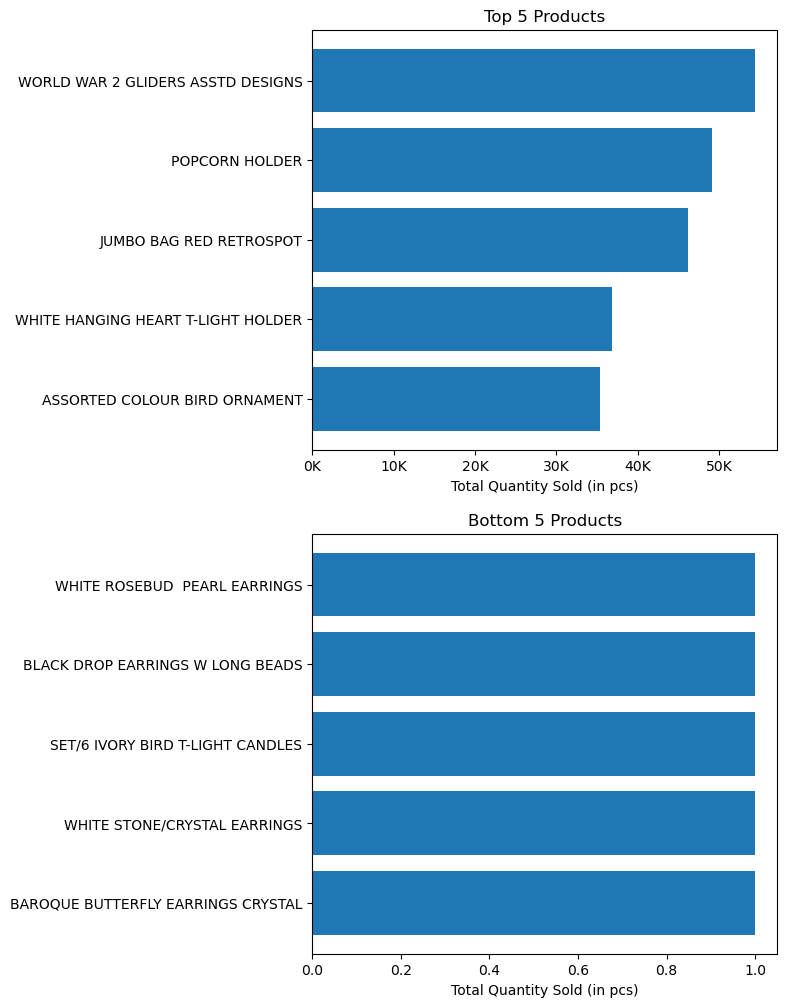

In [100]:
fig, ax = plt.subplots(2, 1, figsize=(6, 12))

prod_qty_top = df_product_qty.head().sort_values('Quantity', ascending=True)

# Figure 1
ax[0].barh(prod_qty_top['Description'], prod_qty_top['Quantity'])
ax[0].set_title('Top 5 Products')
ax[0].set_xlabel('Total Quantity Sold (in pcs)')
ax[0].xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '{:.0f}K'.format(x*1e-3)))

prod_qty_bottom = df_product_qty.tail().sort_values('Quantity', ascending=True)

# Figure 2
ax[1].barh(prod_qty_bottom['Description'], prod_qty_bottom['Quantity'])
ax[1].set_title('Bottom 5 Products')
ax[1].set_xlabel('Total Quantity Sold (in pcs)')

plt.show()

Based on the chart above, the top selling products are more likely in the functional accessory category, while the least selling products fall into the non-functional accessory category (jewelry etc)

#### Customer Segmentation
1. Customer count in each country

In [102]:
df_cust_country = df_cleaned['CustomerID'].groupby(df_cleaned['Country']).nunique().reset_index()
df_cust_country.head()

,Country,CustomerID
0,Australia,9
1,Austria,11
2,Bahrain,2
3,Belgium,25
4,Brazil,1


In [104]:
df_cust_country.describe()

,CustomerID
count,37.000000
mean,117.432432
std,642.656489
min,1.000000
25%,2.000000
50%,6.000000
75%,11.000000
max,3919.000000


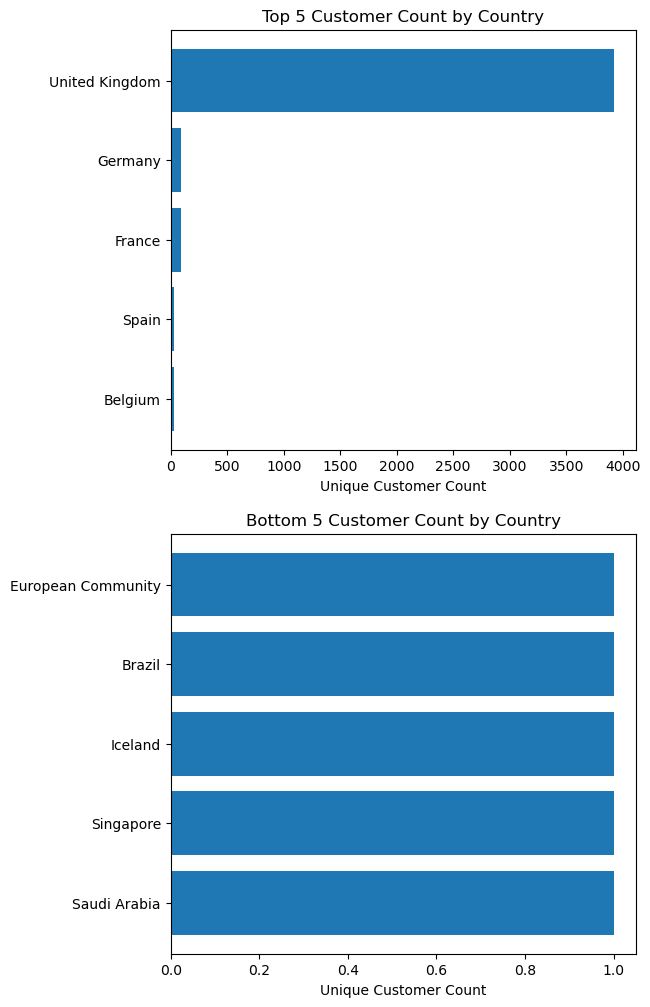

In [112]:
fig, ax = plt.subplots(2, 1, figsize=(6, 12))

cust_count = df_cust_country.sort_values('CustomerID', ascending=False)
cust_top = cust_count.head().sort_values('CustomerID')

ax[0].barh(cust_top['Country'], cust_top['CustomerID'])
ax[0].set_title('Top 5 Customer Count by Country')
ax[0].set_xlabel('Unique Customer Count')

cust_bottom = cust_count.tail().sort_values('CustomerID')
# cust_top, cust_bottom

ax[1].barh(cust_bottom['Country'], cust_bottom['CustomerID'])
ax[1].set_title('Bottom 5 Customer Count by Country')
ax[1].set_xlabel('Unique Customer Count')

plt.show()

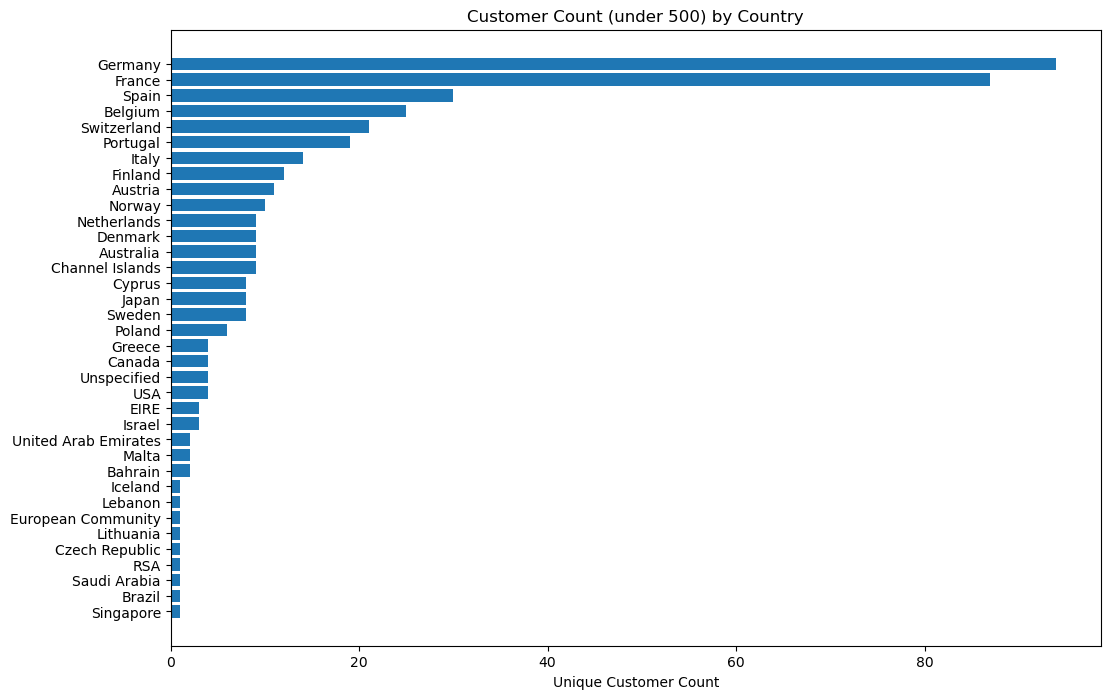

In [114]:
fig, ax = plt.subplots(1, 1, figsize=(12, 8))

cust_dist = df_cust_country[df_cust_country['CustomerID'] < 500].sort_values('CustomerID')

ax.barh(cust_dist['Country'], cust_dist['CustomerID'])
ax.set_title('Customer Count (under 500) by Country')
ax.set_xlabel('Unique Customer Count')

plt.show()

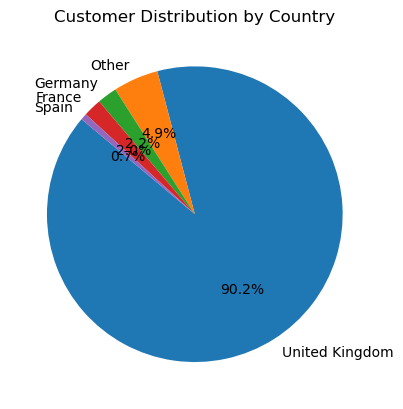

In [116]:
df_cust_country2 = df_cleaned['CustomerID'].groupby(df_cleaned['Country']).nunique().reset_index().sort_values(by='CustomerID',ascending=False)
df_cust_country2.loc[df_cust_country2['CustomerID'] < 30, 'Country'] = 'Other'

df_cust_country2 = df_cust_country2['CustomerID'].groupby(df_cust_country2['Country']).sum().reset_index().sort_values(by='CustomerID',ascending=False)

plt.pie(df_cust_country2['CustomerID'], labels=df_cust_country2['Country'], autopct='%1.1f%%', startangle=140)
plt.title('Customer Distribution by Country')
plt.show()

2. Transaction count based on CustomerID

In [118]:
df_trx_cust = df_cleaned['InvoiceNo'].groupby(df_cleaned['CustomerID']).nunique().reset_index()
df_trx_cust.describe()

,CustomerID,InvoiceNo
count,4337.000000,4337.000000
mean,15301.089232,4.272539
std,1721.422291,7.698808
min,12347.000000,1.000000
25%,13814.000000,1.000000
50%,15300.000000,2.000000
75%,16779.000000,5.000000
max,18287.000000,209.000000


The average of transactions made by customers in a year is 4 and the median is 2.

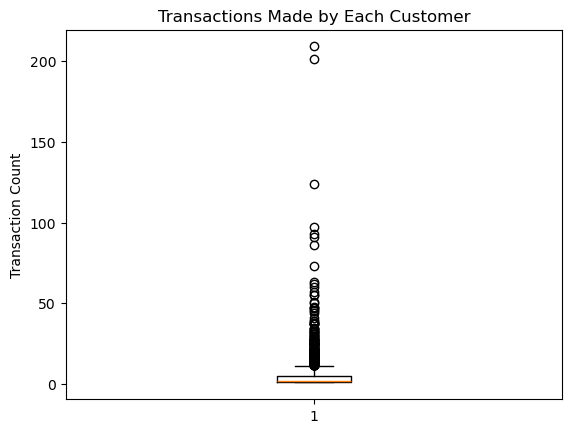

In [120]:
plt.boxplot(df_trx_cust['InvoiceNo'])
plt.title('Transactions Made by Each Customer')
plt.ylabel('Transaction Count')

plt.show()

Most of customers made under 50 transactions in a year.

3. Customer average/median/min/max spending

In [123]:
df_trx = df_cleaned['Total Price'].groupby(df_cleaned['CustomerID']).sum().reset_index()
df_trx.describe()

,CustomerID,Total Price
count,4337.000000,4337.000000
mean,15301.089232,1996.591032
std,1721.422291,8544.898224
min,12347.000000,2.900000
25%,13814.000000,307.090000
50%,15300.000000,673.260000
75%,16779.000000,1661.330000
max,18287.000000,280206.020000


The average spending in a year is 1,996.59 unit per customer with standard deviation of 8,544.90, which depicts wide distribution of data.

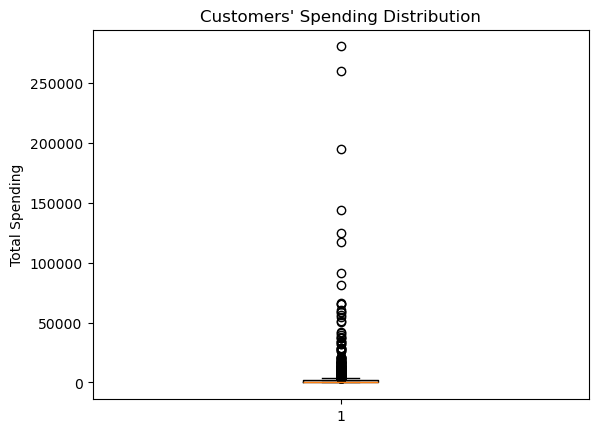

In [126]:
plt.boxplot(df_trx['Total Price'])
plt.title("Customers' Spending Distribution")
plt.ylabel('Total Spending')

plt.show()

4. Total products qty bought per CustomerID

In [128]:
df_qty_cust = df_cleaned['Quantity'].groupby(df_cleaned['CustomerID']).sum().reset_index()
df_qty_cust.describe()

,CustomerID,Quantity
count,4337.000000,4337.000000
mean,15301.089232,1155.058335
std,1721.422291,4769.403749
min,12347.000000,1.000000
25%,13814.000000,160.000000
50%,15300.000000,379.000000
75%,16779.000000,991.000000
max,18287.000000,196915.000000


The description depicts a wide-range of data distribution with median of 379 pcs, average of 1,155 pcs, and standard deviation of 4,769.

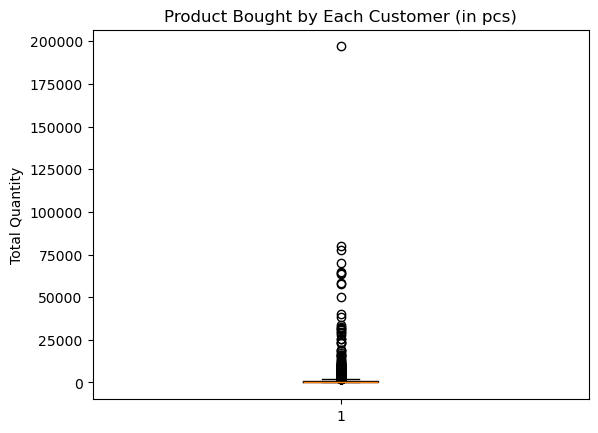

In [130]:
plt.boxplot(df_qty_cust['Quantity'])
plt.title('Product Bought by Each Customer (in pcs)')
plt.ylabel('Total Quantity')

plt.show()

#### Correlation

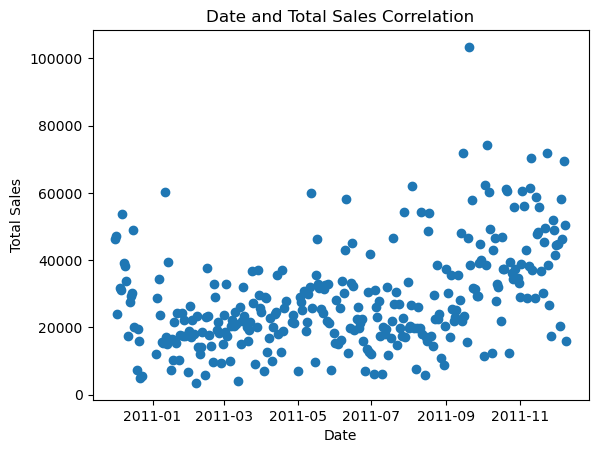

In [144]:
# Date vs. Total Sales
x_date = df_cleaned['Date'].drop_duplicates()
y_sales = df_cleaned['Total Price'].groupby(df_cleaned['Date']).sum()

# x_date, y_sales

plt.scatter(x_date, y_sales)

plt.title('Date and Total Sales Correlation')
plt.xlabel('Date')
plt.ylabel('Total Sales')

plt.show()

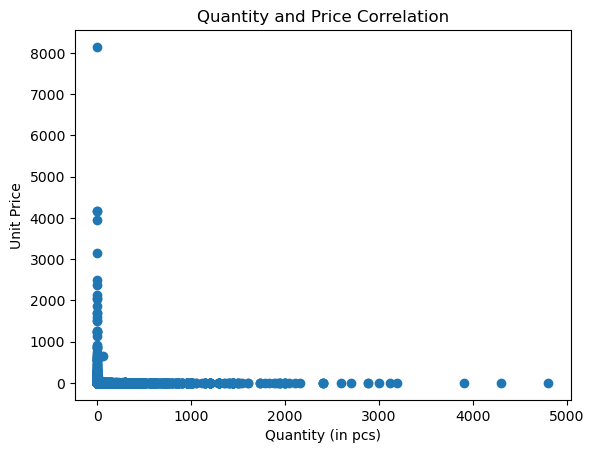

In [198]:
# Quantity vs Price
qty_total = df_cleaned['Quantity']
price = df_cleaned['UnitPrice']

plt.scatter(qty_total, price)

plt.title('Quantity and Price Correlation')
plt.xlabel('Quantity (in pcs)')
plt.ylabel('Unit Price')

plt.show()

In [200]:
from scipy.stats import pearsonr

print(f'Correlation coefficient of Quantity Sold and Unit Price: {pearsonr(qty_total, price)}')

Correlation coefficient of Quantity Sold and Unit Price: PearsonRResult(statistic=-0.018561593952000736, pvalue=1.1432830242008157e-31)


There is a week negative correlation between Quantity Sold and Unit Price

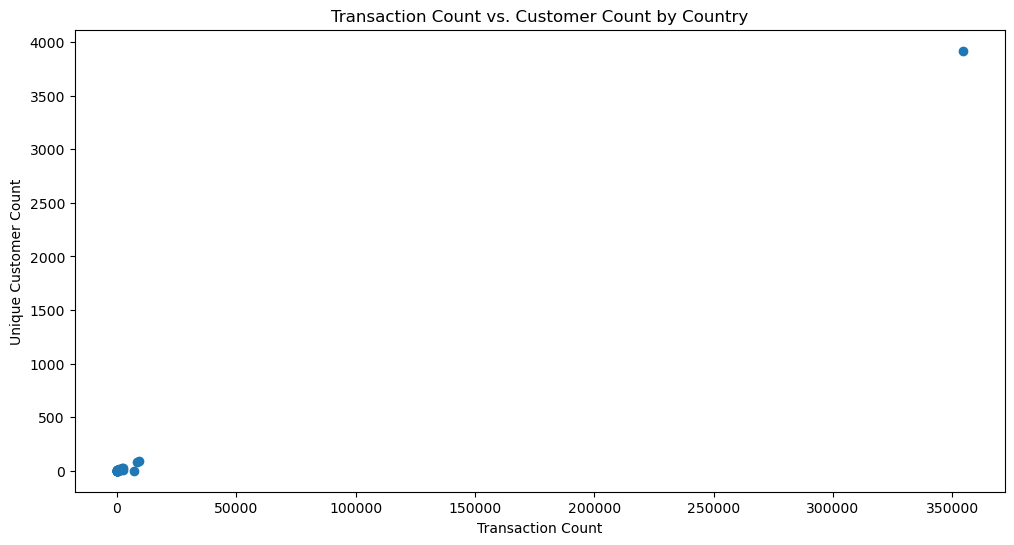

In [203]:
# Transaction Count vs. Unique Customer Count by Country

fig, ax = plt.subplots(1, 1, figsize=(12, 6))

df_cust_country_sorted = df_cust_country.sort_values('Country')
df_country_sorted = df_country.sort_values('Country')

x_trx = df_country_sorted['InvoiceNo']
y_cust = df_cust_country_sorted['CustomerID']

plt.scatter(x_trx, y_cust)

plt.title('Transaction Count vs. Customer Count by Country')
plt.xlabel('Transaction Count')
plt.ylabel('Unique Customer Count')

plt.show()

In [205]:
print(f'Correlation coefficient of Transaction and Customer Count: {pearsonr(x_trx, y_cust)}')

Correlation coefficient of Transaction and Customer Count: PearsonRResult(statistic=0.999783771002169, pvalue=1.7992448190831384e-60)


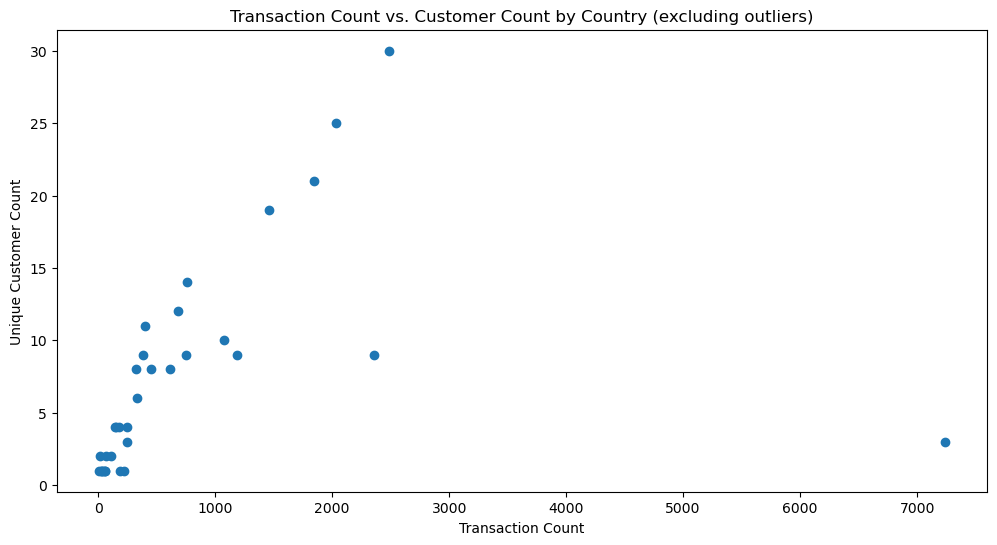

In [207]:
# Transaction Count vs. Unique Customer Count by Country

fig, ax = plt.subplots(1, 1, figsize=(12, 6))

df_cust_country_sorted = df_cust_country[df_cust_country['CustomerID'] <= 80].sort_values('Country')
df_country_sorted = df_country[df_country['InvoiceNo'] <= 8000].sort_values('Country')

x_trx = df_country_sorted['InvoiceNo']
y_cust = df_cust_country_sorted['CustomerID']

plt.scatter(x_trx, y_cust)

plt.title('Transaction Count vs. Customer Count by Country (excluding outliers)')
plt.xlabel('Transaction Count')
plt.ylabel('Unique Customer Count')

plt.show()

The graphs and correlation coefficient calculation result above depicts a strong positive correlation between Unique Customer Count and Transaction Count in each country with a correlation coefficient value of **0.9998**

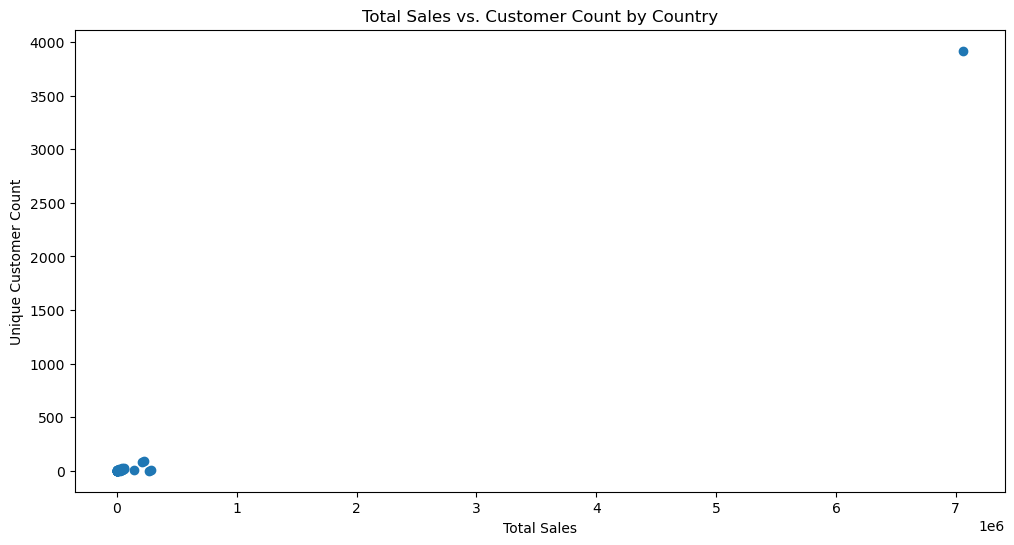

In [209]:
# Sales Amount vs. Unique Customer Count by Country

fig, ax = plt.subplots(1, 1, figsize=(12, 6))

df_cust_country_sorted = df_cust_country.sort_values('Country')
df_country_sales_sorted = df_country_sales.sort_values('Country')

x_sales = df_country_sales_sorted['Total Price']
y_cust = df_cust_country_sorted['CustomerID']

plt.scatter(x_sales, y_cust)

plt.title('Total Sales vs. Customer Count by Country')
plt.xlabel('Total Sales')
plt.ylabel('Unique Customer Count')

plt.show()

In [211]:
print(f'Correlation coefficient of Total Sales and Customer Count: {pearsonr(x_sales, y_cust)}')

Correlation coefficient of Total Sales and Customer Count: PearsonRResult(statistic=0.9984943147220845, pvalue=1.0001680146410126e-45)


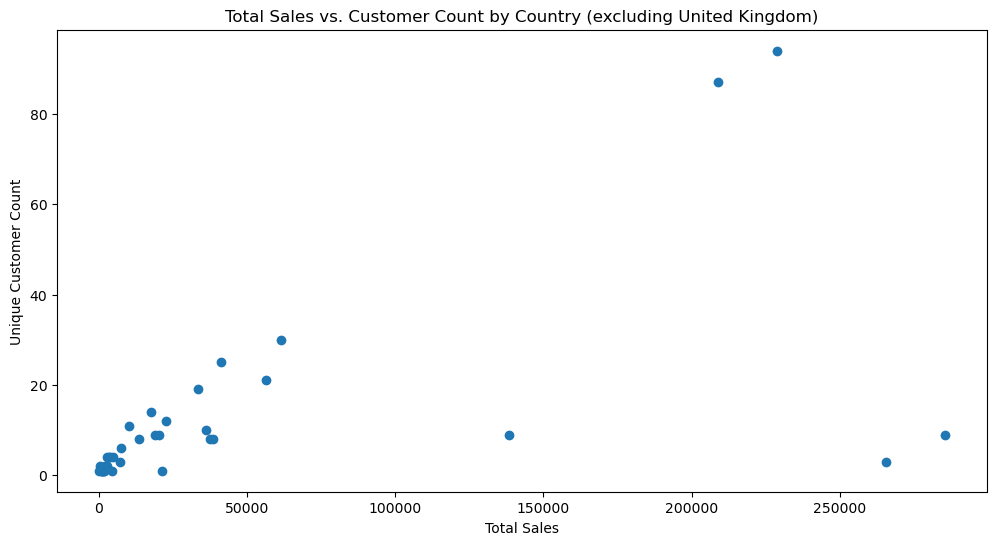

In [213]:
# Sales Amount vs. Unique Customer Count by Country

fig, ax = plt.subplots(1, 1, figsize=(12, 6))

df_cust_country_sorted = df_cust_country[df_cust_country['Country'] != 'United Kingdom'].sort_values('Country')
df_country_sales_sorted = df_country_sales[df_country_sales['Country'] != 'United Kingdom'].sort_values('Country')

x_sales = df_country_sales_sorted['Total Price']
y_cust = df_cust_country_sorted['CustomerID']

plt.scatter(x_sales, y_cust)

plt.title('Total Sales vs. Customer Count by Country (excluding United Kingdom)')
plt.xlabel('Total Sales')
plt.ylabel('Unique Customer Count')

plt.show()

The graphs and correlation coefficient calculation result above depicts a strong positive correlation between Unique Customer Count and Total Sales in each country with a correlation coefficient value of **0.9984**

### Insights
1. Focus marketing on:
    - countries with transactions less than 1,000 in a year (mostly Asian countries and USA)
    - Q1 & Q3 of each year so sales will become more stable (high increase in Q3 and Q4)
    - functional products category

2. Based on the correlation, it is better to **build a customer community** to attract more customers in each country (because several countries only have 1 unique CustomerID making transactions) and **engage existing customers to make transactions more frequently**, which will lead to sales increase